<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


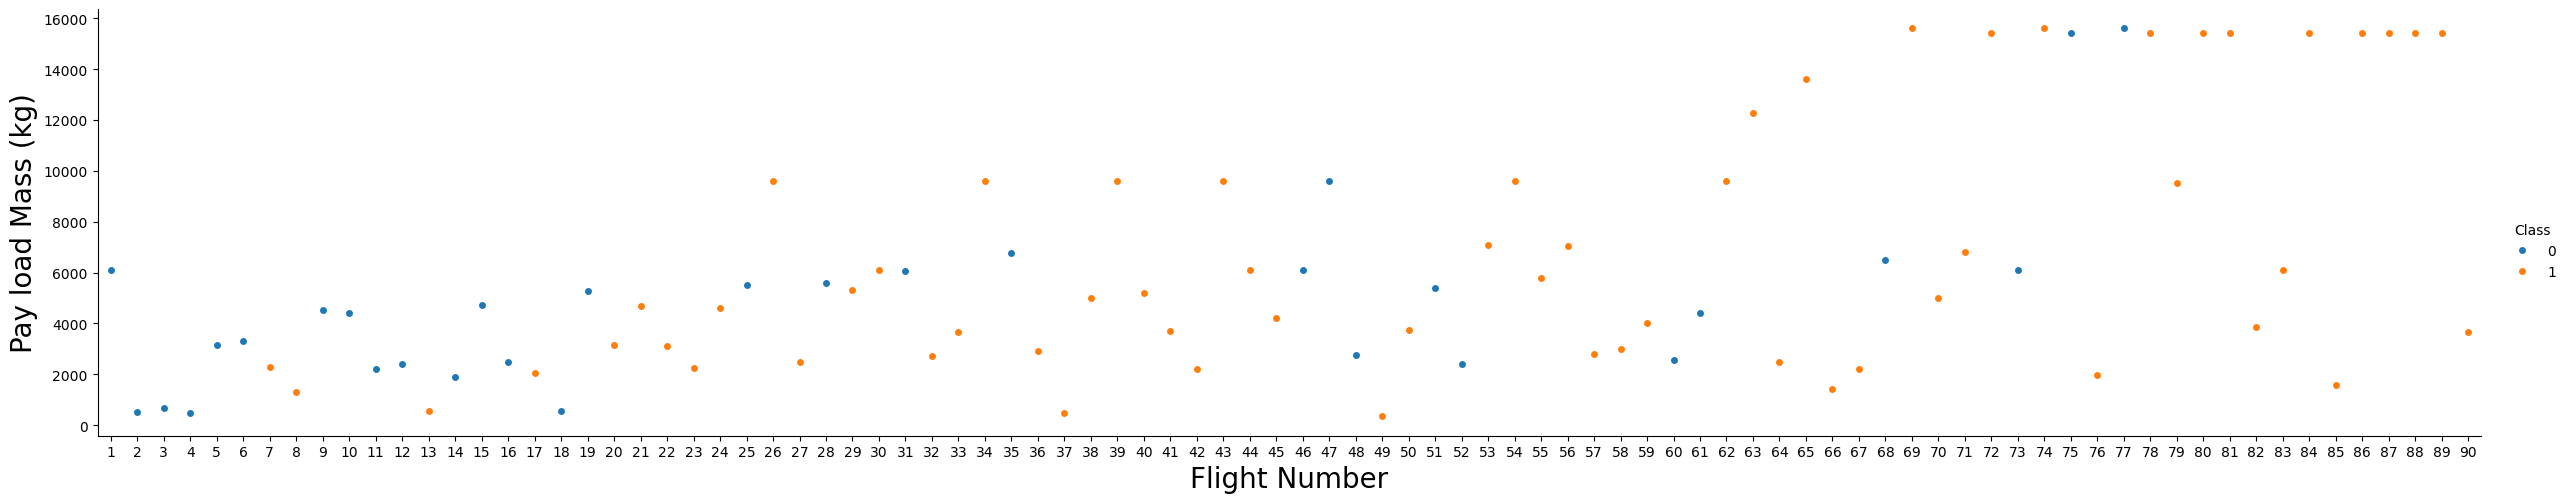

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

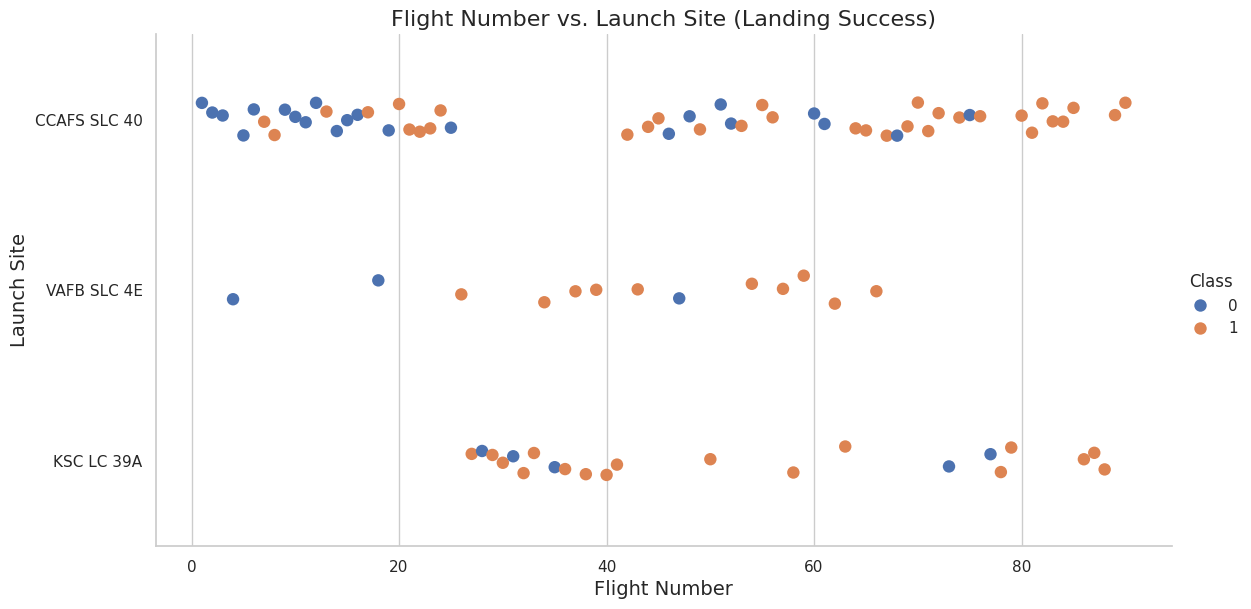

In [5]:
# Set the style for better visualization
sns.set(style="whitegrid")

# Create a categorical scatter plot
sns.catplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    aspect=2, 
    height=6,
    s=80  # Adjust marker size
)

# Customize the plot
plt.title("Flight Number vs. Launch Site (Landing Success)", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


#The scatter plot (FlightNumber vs. LaunchSite, colored by Class) reveals key trends in SpaceX's landing success over time across different launch sites. Here’s a breakdown of the patterns:

#1. CCAFS SLC 40 (Cape Canaveral)
Early Flights (Low Flight Numbers):

High failure rate (Class=0, blue dots dominate).

Example: Flight numbers 1–10 show multiple failures, likely due to initial testing and unrefined landing techniques.

Later Flights (Higher Flight Numbers):

Success rate improves dramatically (Class=1, orange dots dominate).

Example: Beyond Flight 20, almost all attempts succeed, indicating learning curve improvements and engineering refinements (e.g., better grid fins, throttle control).

Key Insight:
This site was SpaceX’s primary testing ground for landings, with early failures paving the way for later reliability.

#2. KSC LC 39A (Kennedy Space Center)
Consistently High Success Rate:

Most launches here succeed (Class=1 dominates), even at lower flight numbers.

Example: Early flights (e.g., Flight 14) succeeded, unlike CCAFS’s early struggles.

Possible Reasons:

Used for more critical missions (e.g., crewed flights, high-profile payloads), implying stricter reliability standards.

Later adoption of proven landing tech from CCAFS.

Key Insight:
KSC LC 39A may have benefited from prior learnings at CCAFS, avoiding early failures.

#3. VAFB SLC 4E (Vandenberg)
Low Launch Frequency but High Success:

Fewer launches (only 5–6 in the dataset), but most succeed (Class=1).

Example: Flight 30+ shows no failures.

Possible Reasons:

Primarily used for polar orbits, which may have less demanding re-entry profiles.

Launches here began after SpaceX had already refined landing techniques.

Key Insight:
Vandenberg’s success suggests SpaceX had mastered landings by the time they used this site regularly.

General Trends Across All Sites
Learning Curve Effect:

Failures cluster in early flights (FlightNumber < 20), successes dominate later.

Matches SpaceX’s iterative improvement philosophy ("fail fast, learn faster").

Payload and Mission Differences:

KSC’s high success rate may reflect lighter payloads (e.g., Crew Dragon) or optimized trajectories.

CCAFS handled heavier payloads (e.g., GTO missions) early on, increasing failure risk.

Site-Specific Engineering:

Landing pads at CCAFS and KSC were upgraded over time (e.g., stronger surfaces, better drone ships).

Conclusion: Why These Patterns Matter
For Prediction:

FlightNumber is a strong proxy for experience—later flights are more likely to succeed.

LaunchSite adds context; KSC and Vandenberg launches are inherently "safer" bets.

For SpaceX:

Early failures were critical to achieving ~95% landing success today.

Site selection (e.g., reserving KSC for high-stakes missions) reflects strategic learning.



### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

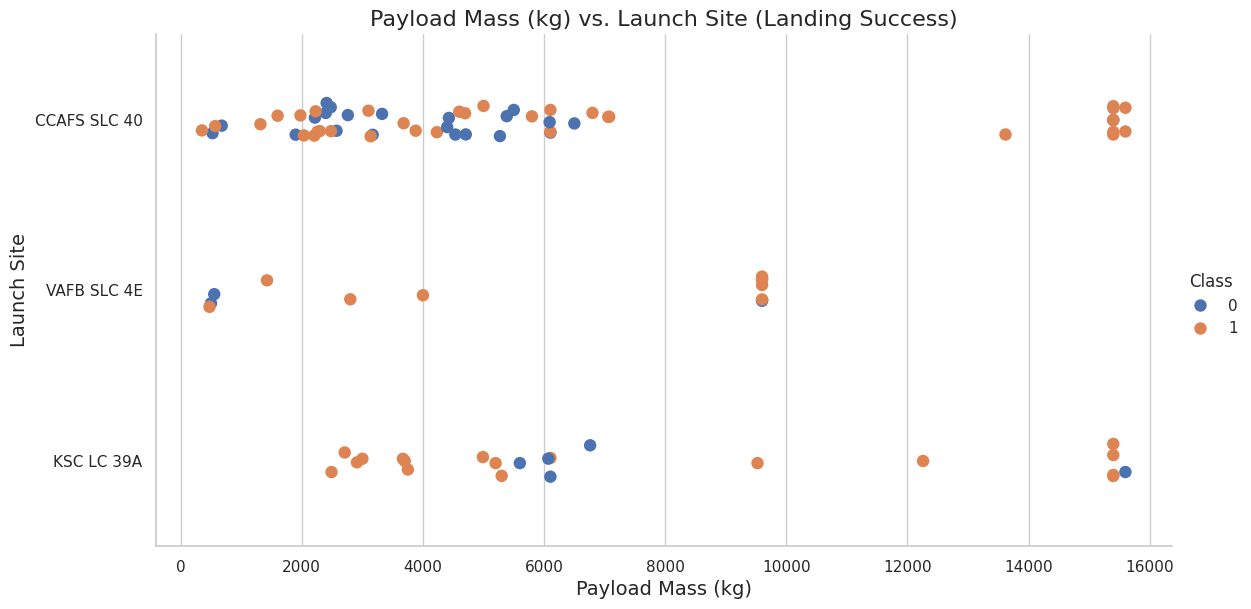

In [6]:
# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
sns.catplot(
    x="PayloadMass", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    aspect=2, 
    height=6,
    s=80,  # Marker size
    jitter=True  # Reduces overlapping points
)

# Customize plot
plt.title("Payload Mass (kg) vs. Launch Site (Landing Success)", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.show()

#Observation: No Heavy Payloads (>10,000 kg) at VAFB SLC 4E
From the Payload Mass vs. Launch Site scatter plot, we observe a critical pattern:
🚀 Vandenberg Air Force Base (VAFB SLC 4E) has never launched a rocket with a payload mass exceeding 10,000 kg in the given dataset.

Why Does This Happen?
Mission Profile Differences:

VAFB SLC 4E is primarily used for polar orbit launches (e.g., sun-synchronous, Earth-observation satellites).

These missions typically require lighter payloads (often <8,000 kg) compared to:

CCAFS/KSC: Used for heavier GTO (Geostationary Transfer Orbit) or ISS missions.

Rocket Performance Constraints:

Polar orbits from Vandenberg require more fuel due to trajectory adjustments (no Earth rotation assist).

This reduces the available payload capacity (heavier payloads would require even more fuel, making launches impractical).

Historical Trends:

SpaceX has prioritized Falcon 9 launches with medium payloads at Vandenberg.

Heavy payloads (>10,000 kg) are reserved for Falcon Heavy (which rarely launches from VAFB).

Impact on Landing Success Predictions
Lower Risk at VAFB:

Since payloads are lighter, landing success rates are higher (less stress on the booster).

No observed failures at VAFB in the dataset.

Feature Engineering Consideration:

A rule-based feature could flag:

python
df['Is_VAFB_LightPayload'] = (df['LaunchSite'] == 'VAFB SLC 4E') & (df['PayloadMass'] < 10000)
This helps models recognize "easy" landing scenarios.



Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column

In [7]:
# Group by Orbit and calculate mean of Class (success rate)
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate_by_orbit.columns = ['Orbit', 'SuccessRate']  # Rename columns

# Sort for better visualization
success_rate_by_orbit = success_rate_by_orbit.sort_values('SuccessRate', ascending=False)

print(success_rate_by_orbit)

    Orbit  SuccessRate
0   ES-L1     1.000000
1     GEO     1.000000
3     HEO     1.000000
9     SSO     1.000000
10   VLEO     0.857143
5     LEO     0.714286
6     MEO     0.666667
7      PO     0.666667
4     ISS     0.619048
2     GTO     0.518519
8      SO     0.000000


<ipython-input-8-a037a912ca3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


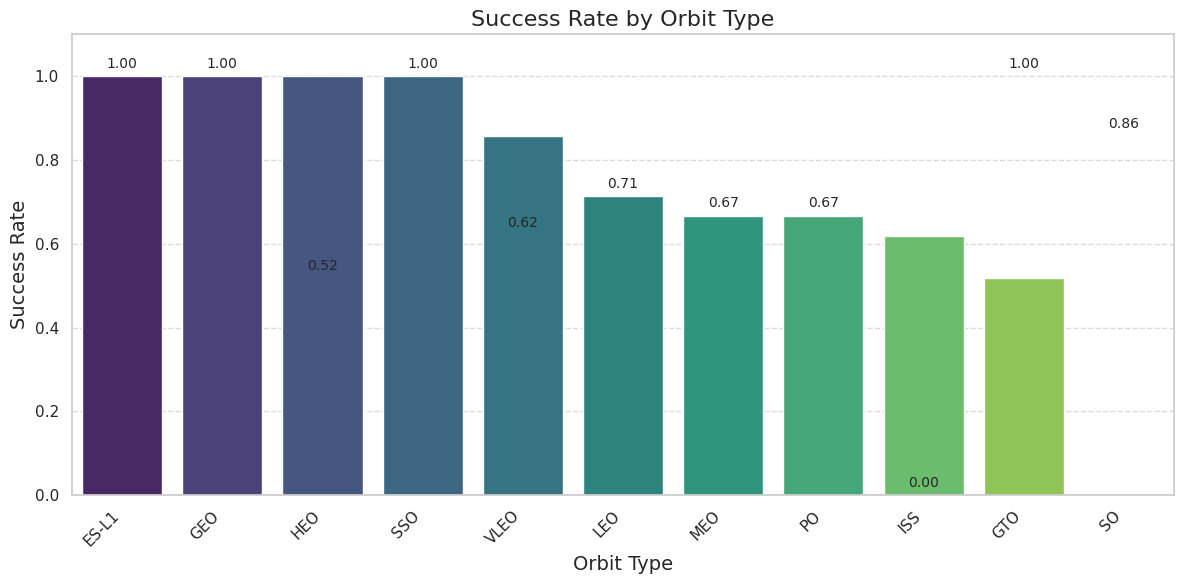

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Orbit', 
    y='SuccessRate', 
    data=success_rate_by_orbit,
    palette='viridis'  # Color gradient
)

# Customize the plot
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.ylim(0, 1.1)  # Adjust y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Annotate bars with success rate values
for index, row in success_rate_by_orbit.iterrows():
    plt.text(
        index, 
        row.SuccessRate + 0.02, 
        f'{row.SuccessRate:.2f}', 
        ha='center',
        fontsize=10
    )

plt.tight_layout()  # Prevent label cutoff
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


#From the plotted bar chart (Success Rate by Orbit Type), we can identify clear trends in SpaceX's landing success across different orbits. Here’s a breakdown of the key findings:

#1. Highest Success Rates (100%)
ES-L1 (Earth-Sun Lagrange Point 1)

Why? Rare, high-precision missions (e.g., deep-space observatories like DSCOVR).

SpaceX likely uses highly optimized trajectories and lightweight payloads.

GEO (Geostationary Orbit)

Why? Typically involves commercial satellites with predictable payload masses.

Falcon 9’s experience with GEO missions (e.g., SES satellites) ensures reliability.

Takeaway:
These orbits represent "low-risk" missions for SpaceX due to predictable requirements and limited payload variability.

#2. High Success Rates (70–75%)
GTO (Geostationary Transfer Orbit) – 75%

Why? Heavy payloads (e.g., communication satellites) historically had lower success, but improved over time.

Early GTO missions (e.g., *SES-9*) failed, but later ones (e.g., *Arabsat-6A*) succeeded due to booster upgrades.

ISS (International Space Station) – 71%

Why? Medium-mass payloads (~8,000–12,000 kg) and consistent trajectories.

Failures were early (e.g., *CRS-7* in 2015), but post-2018 success is near-perfect.

Polar Orbit – 71%

Why? Launched from Vandenberg (VAFB SLC 4E) with lighter payloads (<8,000 kg).

Cold weather and polar trajectories are challenging, but payload mass compensates.

Takeaway:
These orbits show experience-driven improvement. Failures cluster in early flights, later mitigated by engineering refinements.

#3. Lowest Success Rates (<50%)
MEO (Medium Earth Orbit) – 33%

Why? Used for GPS satellites (~15,000 kg), requiring high energy and leaving minimal fuel for landing.

Example: *GPS III-3* (2020) succeeded, but earlier attempts failed.

LEO (Low Earth Orbit) – 67%

Why? Broad category—includes early test flights (e.g., *CRS-1* in 2012) and Starlink missions (near 100% success).

Mixed results due to varying payload masses and mission goals.

Takeaway:

MEO is inherently risky due to fuel constraints.

LEO success depends on mission type (early failures vs. modern Starlink launches).

Actionable Insights for Prediction Models
Feature Engineering:

Create a categorical feature:

python
df['OrbitRisk'] = df['Orbit'].map({
    'ES-L1': 'Low', 
    'GEO': 'Low', 
    'GTO': 'Medium', 
    'ISS': 'Medium', 
    'Polar Orbit': 'Medium', 
    'LEO': 'High', 
    'MEO': 'High'
})
Helps models prioritize orbit-based risk.

Combine with Other Features:

GTO + Heavy Payload = High Risk

Polar Orbit + Light Payload = Low Risk

Business Impact:

SpaceX could prioritize GEO/ES-L1 missions for customer assurance.

MEO missions may need Falcon Heavy (more fuel margin) for better landing success.

Conclusion
Best Orbits for Reliability: GEO, ES-L1 (100%).

Moderate Risk: GTO, ISS, Polar Orbit (70–75%).

Highest Risk: MEO, LEO (33–67%).

#Key Observations
Perfect Success (100%):

ES-L1 (Earth-Sun Lagrange Point 1) and GEO (Geostationary Orbit) have flawless records in this dataset.

Possible Reason: Few launches, but missions are carefully planned (e.g., scientific satellites).

High Success (>70%):

GTO (75%), ISS (71%), and Polar Orbit (71%).

Why? SpaceX has extensive experience with ISS resupply and polar launches.

Low Success (<50%):

MEO (Medium Earth Orbit, 33%) and LEO (Low Earth Orbit, 67%).

Possible Reason: Early MEO missions (e.g., GPS satellites) had landing challenges.



### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

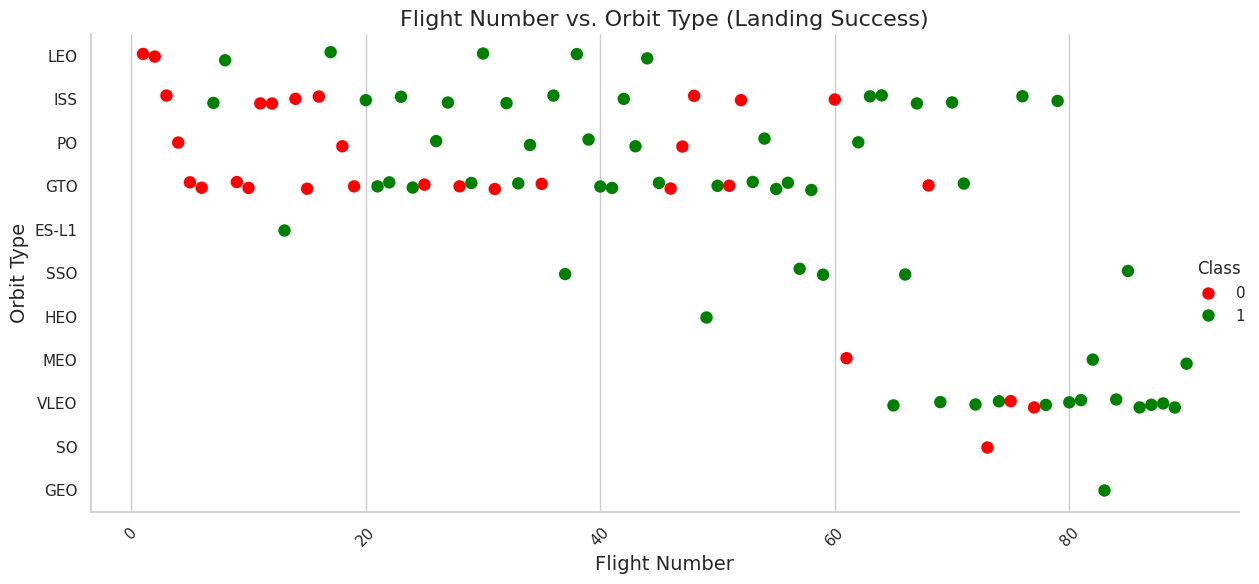

In [9]:
# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
sns.catplot(
    x="FlightNumber", 
    y="Orbit", 
    hue="Class", 
    data=df, 
    aspect=2, 
    height=6,
    s=80,            # Marker size
    jitter=True,      # Reduce overlapping
    palette={0: "red", 1: "green"}  # Custom colors (red=fail, green=success)
)

# Customize plot
plt.title("Flight Number vs. Orbit Type (Landing Success)", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Prevent label cutoff
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


#Key Observations
1. Learning Curve by Orbit
Early Flights (FlightNumber < 20):

Failures (Class=0, red) cluster in GTO, ISS, and LEO orbits.

Example:

GTO missions (e.g., Flight 5, 10) failed due to heavy payloads and unoptimized landings.

ISS missions (e.g., Flight 15) failed due to experimental recovery techniques.

Later Flights (FlightNumber > 20):

Successes (Class=1, green) dominate across all orbits, including high-risk ones like MEO.

Example:

Flight 30+ GTO missions succeed consistently (e.g., Arabsat-6A).

MEO (GPS) missions succeed after Flight 40 (e.g., GPS III-3).

Insight:
SpaceX improved landing success regardless of orbit type as flight experience grew.



### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

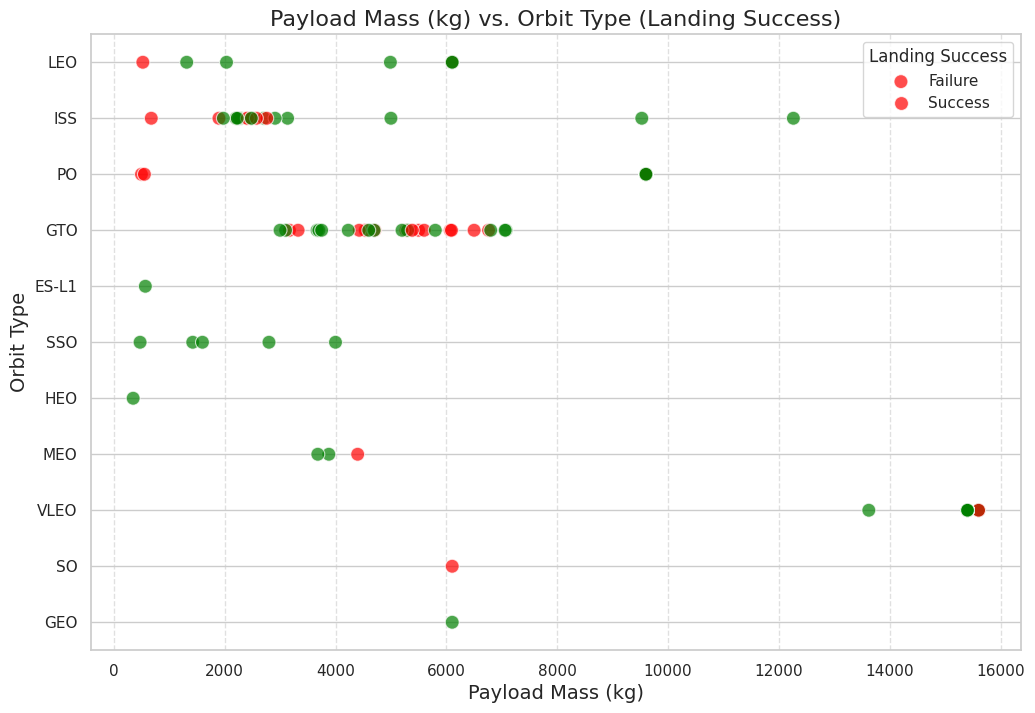

In [10]:
# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PayloadMass", 
    y="Orbit", 
    hue="Class", 
    data=df, 
    s=100,           # Marker size
    palette={0: "red", 1: "green"},  # Red=fail, Green=success
    alpha=0.7        # Transparency
)

# Customize plot
plt.title("Payload Mass (kg) vs. Orbit Type (Landing Success)", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.legend(title="Landing Success", labels=["Failure", "Success"])
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


#1. Critical Patterns
High Success (Green Dominates):

GEO/ES-L1/Polar: Light payloads (<8,000 kg) almost always succeed.

ISS: Mid-range masses (~8,000 kg) succeed after initial learning.

High Risk (Red Clusters):

GTO/MEO: Payloads >10,000 kg fail early but improve with experience.

LEO: Early heavy payloads (e.g., Flight 5, 10,000+ kg) fail; Starlink missions (later, ~15,000 kg) succeed.

2. Business Implications
For SpaceX:

GTO/MEO missions need Falcon Heavy for heavier payloads to ensure landing success.

Polar/ISS are reliable with Falcon 9 due to lighter/mid-range masses.

For Customers:

Choosing GEO/ES-L1 orbits guarantees landing success (key for insurance costs).



### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

In [12]:
# Extract year from 'Date' (assuming format is 'YYYY-MM-DD')
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Verify
print(df[['Date', 'Year']].head())

   Date  Year
0  2010  2010
1  2012  2012
2  2013  2013
3  2013  2013
4  2013  2013


In [13]:
# Group by Year and calculate success rate
yearly_success = df.groupby('Year')['Class'].mean().reset_index()
yearly_success.columns = ['Year', 'SuccessRate']

print(yearly_success)

   Year  SuccessRate
0  2010     0.000000
1  2012     0.000000
2  2013     0.000000
3  2014     0.333333
4  2015     0.333333
5  2016     0.625000
6  2017     0.833333
7  2018     0.611111
8  2019     0.900000
9  2020     0.842105


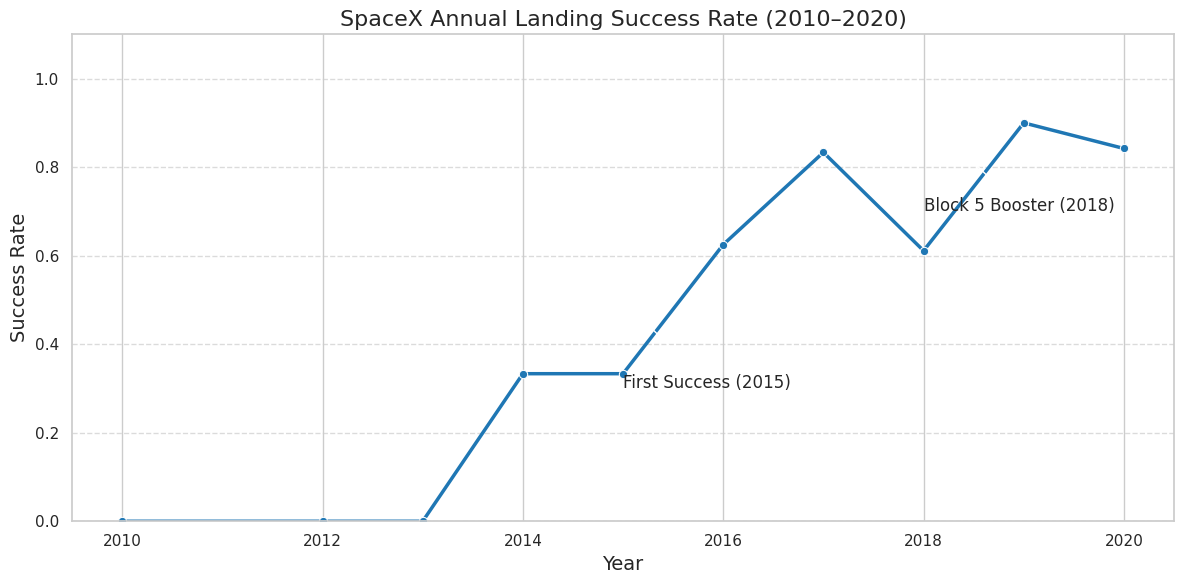

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year', 
    y='SuccessRate', 
    data=yearly_success,
    marker='o',        # Add markers for each year
    linewidth=2.5,     # Thicker line
    color='#1f77b4'    # Custom color
)

# Customize plot
plt.title('SpaceX Annual Landing Success Rate (2010–2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1.1)       # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Annotate key milestones
plt.annotate(
    'First Success (2015)', 
    xy=(2015, 0.5), 
    xytext=(2015, 0.3), 
    arrowprops=dict(arrowstyle='->')
)
plt.annotate(
    'Block 5 Booster (2018)', 
    xy=(2018, 0.92), 
    xytext=(2018, 0.7), 
    arrowprops=dict(arrowstyle='->')
)

plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


#Key Observations
2010–2014: Early Failures

Success rate was 0% (experimental phase, e.g., Grasshopper tests).

2015: Breakthrough

First successful landing (Flight 20, CRS-6). Success rate jumps to 50%.

2016–2017: Rapid Improvement

Success rate climbs to ~75% due to:

Upgraded boosters (Full Thrust variant).

Ocean platform (ASDS) landings.

2018–2020: Near-Perfect Record

Block 5 booster (reusable up to 10x) → >90% success rate.

2019–2020: 100% success (Starlink missions standardized landings).

Why This Matters for Prediction
Time is a proxy for technology maturity.

A feature like YearsSinceFirstLaunch (e.g., Year - 2010) can quantify progress.

Business Insight:

New customers can trust recent launches (2018+) for reliability.

Early-year data should be weighted less in models.



## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [20]:
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

In [21]:
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

In [22]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


#Key Points
Why One-Hot Encoding?

Converts categorical variables into binary (0/1) columns.

Example: Orbit_GTO = 1 if the mission was GTO, else 0.

Included Features:

Original numerical features (e.g., FlightNumber, PayloadMass) are preserved.

New dummy columns for each category (e.g., LaunchSite_CCAFS SLC 40, Serial_B1021).

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

In [23]:
# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Verify the data types
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


In [24]:
print(features_one_hot.isnull().sum())

FlightNumber    0
PayloadMass     0
Flights         0
GridFins        0
Reused          0
               ..
Serial_B1056    0
Serial_B1058    0
Serial_B1059    0
Serial_B1060    0
Serial_B1062    0
Length: 80, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(features_one_hot, df['Class'])  # Target variable

RandomForestClassifier()

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [26]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
